## Imports:

In [1]:
import scipy.io
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plt_lab
import matplotlib.gridspec as gridspec
import obspy
import pandas as pd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

## Load data:
We are going to use this data to plot spectograms of SCG signals. 

In [2]:
dir_path = "/Users/ecem/Documents/GitHub/seismocardiogram/data/diseased-dataset/Raw_Recordings"

In [3]:
x = np.load(dir_path + "/tr_x.npy", allow_pickle= True)
y = np.load(dir_path + "/tr_z.npy", allow_pickle= True)
z = np.load(dir_path + "/tr_y.npy", allow_pickle= True)

## Load csv and create two seperate dataframe:
We are going to use heart dataframe to differentiate healty people from the people with diaseaes. Data's of healty people will be stored in the healty dataset while diseased people will be in diseased dataset.

In [4]:
heart = pd.read_excel("/Users/ecem/Documents/GitHub/seismocardiogram/data/diseased-dataset/Summary_Pub_Deidentified.xlsx")
df = heart.copy().fillna(0)

I have dropped some columns because they didnt have much information. ????????

In [5]:
df.drop(["Mitral valve Peak velocity (m/sec)",
         "Mitral valve Mean gradient(mmHg)", 
         "Echo available",
        "Date of collection",
        "Date of echo"], 
        inplace = True, axis = 1)
df.drop(df.tail(1).index,inplace=True)

In [6]:
idx_MS = np.where((df['Moderate or greater MS'] == 1.0)  
                  &(df['Moderate or greater MR'] == 0.0)  
                  & (df['Moderate or greater AR'] == 0.0)
                  &(df['Moderate or greater AS'] == 0.0)  
                  & (df['moderate or greater TR'] == 0.0))

In [7]:
idx_MS

(array([ 8, 28, 62]),)

In [8]:
diseased_MS = df.loc[idx_MS]

In [9]:
idx_MR = np.where((df['Moderate or greater MS'] == 0.0)  
                  &(df['Moderate or greater MR'] == 1.0)  
                  & (df['Moderate or greater AR'] == 0.0)
                  &(df['Moderate or greater AS'] == 0.0)  
                  & (df['moderate or greater TR'] == 0.0))

In [10]:
idx_MR

(array([ 0,  2, 12, 19, 27, 31, 32, 37, 45, 50, 54, 60, 65]),)

In [11]:
diseased_MR = df.loc[idx_MR]

In [12]:
idx_AR = np.where((df['Moderate or greater MS'] == 0.0)  
                  &(df['Moderate or greater MR'] == 0.0)  
                  & (df['Moderate or greater AR'] == 1.0)
                  &(df['Moderate or greater AS'] == 0.0)  
                  & (df['moderate or greater TR'] == 0.0))

In [13]:
idx_AR

(array([17, 21, 26, 39, 68]),)

In [14]:
diseased_AR = df.loc[idx_AR]

In [15]:
idx_AS = np.where((df['Moderate or greater MS'] == 0.0)  
                  &(df['Moderate or greater MR'] == 0.0)  
                  & (df['Moderate or greater AR'] == 0.0)
                  &(df['Moderate or greater AS'] == 1.0)  
                  & (df['moderate or greater TR'] == 0.0))

In [16]:
idx_AS

(array([44, 71, 73, 76, 78, 80, 84, 85, 87, 88, 92, 95, 96, 97, 98, 99]),)

In [17]:
diseased_AS = df.loc[idx_AS]

In [18]:
idx_TR = np.where((df['Moderate or greater MS'] == 0.0)  
                  &(df['Moderate or greater MR'] == 0.0)  
                  & (df['Moderate or greater AR'] == 0.0)
                  &(df['Moderate or greater AS'] == 0.0)  
                  & (df['moderate or greater TR'] == 1.0))

In [19]:
idx_TR

(array([], dtype=int64),)

Now its a time to seperate their waveform too.

These empty list will be used to store array values.

In [20]:
MS_x, MS_y, MS_z = [],[],[]
MR_x, MR_y, MR_z = [],[],[]
AR_x, AR_y, AR_z = [],[],[]
AS_x, AS_y, AS_z = [],[],[]

In [21]:
for i in range(len(diseased_MS['Patient ID'].index)):
    x_ = x[diseased_MS['Patient ID'].index[i]]
    y_ = y[diseased_MS['Patient ID'].index[i]]
    z_ = z[diseased_MS['Patient ID'].index[i]]
    
    MS_x.append(x_)
    MS_y.append(y_) 
    MS_z.append(z_) 

In [22]:
for i in range(len(diseased_MR['Patient ID'].index)):
    x_ = x[diseased_MR['Patient ID'].index[i]]
    y_ = y[diseased_MR['Patient ID'].index[i]]
    z_ = z[diseased_MR['Patient ID'].index[i]]
    
    MR_x.append(x_)
    MR_y.append(y_) 
    MR_z.append(z_) 

In [23]:
for i in range(len(diseased_AR['Patient ID'].index)):
    x_ = x[diseased_AR['Patient ID'].index[i]]
    y_ = y[diseased_AR['Patient ID'].index[i]]
    z_ = z[diseased_AR['Patient ID'].index[i]]
    
    AR_x.append(x_)
    AR_y.append(y_) 
    AR_z.append(z_) 

In [24]:
for i in range(len(diseased_AS['Patient ID'].index)):
    x_ = x[diseased_AS['Patient ID'].index[i]-1]
    y_ = y[diseased_AS['Patient ID'].index[i]-1]
    z_ = z[diseased_AS['Patient ID'].index[i]-1]
    
    AS_x.append(x_)
    AS_y.append(y_) 
    AS_z.append(z_) 

## comparison of two dataset:

Now we will to try visualize spectograms. So far we have used Obspy to visualize SCG signals. However, with obspy we are not able to plot spectograms side by side. This is important for us because we want to see spectograms of x,y and z components simultaneously for both healty and diseased people. So, from now on I will refer to those plots, for 3 components of healty and diseased (in total six plot, as "PAIR".


I have mentioned that Obpsy has a problem in side by side plotting. So I changed it source code. I have added and deleted some part to operate according to my need. ???????????

Thats why from now on we are going to use **output_spectogram** function to get values needed to plot spectogram.

These are the imports for output_spectogram function to work.

In [25]:
from obspy.imaging.cm import obspy_sequential
import math
from matplotlib import mlab
from matplotlib.colors import Normalize

In [26]:
def _nearest_pow_2(x):
    a = math.pow(2, math.ceil(np.log2(x)))
    b = math.pow(2, math.floor(np.log2(x)))
    if abs(a - x) < abs(b - x):
        return a
    else:
        return b

In [27]:
def output_spectrogram(data, samp_rate, per_lap=0.9, wlen=None, log=False,
                outfile=None, fmt=None, axes=None, dbscale=False,
                mult=8.0, cmap=obspy_sequential, zorder=None, title=None,
                show=True, clip=[0.0, 1.0]):
 
    import matplotlib.pyplot as plt
    
    # enforce float for samp_rate
    samp_rate = float(samp_rate)

    # set wlen from samp_rate if not specified otherwise
    if not wlen:
        wlen = samp_rate / 100.

    npts = len(data)
    # nfft needs to be an integer, otherwise a deprecation will be raised
    # XXX add condition for too many windows => calculation takes for ever
    nfft = int(_nearest_pow_2(wlen * samp_rate))
    if nfft > npts:
        nfft = int(_nearest_pow_2(npts / 8.0))

    if mult is not None:
        mult = int(_nearest_pow_2(mult))
        mult = mult * nfft
    nlap = int(nfft * float(per_lap))

    data = data - data.mean()
    end = npts / samp_rate

    # Here we call not plt.specgram as this already produces a plot
    # matplotlib.mlab.specgram should be faster as it computes only the
    # arrays
    # XXX mlab.specgram uses fft, would be better and faster use rfft
    specgram, freq, time = mlab.specgram(data, Fs=samp_rate, NFFT=nfft,
                                         pad_to=mult, noverlap=nlap)
    # db scale and remove zero/offset for amplitude
    if dbscale:
        specgram = 10 * np.log10(specgram[1:, :])
    else:
        specgram = np.sqrt(specgram[1:, :])
    freq = freq[1:]
    
    vmin, vmax = clip
    if vmin < 0 or vmax > 1 or vmin >= vmax:
        msg = "Invalid parameters for clip option."
        raise ValueError(msg)
    _range = float(specgram.max() - specgram.min())
    vmin = specgram.min() + vmin * _range
    vmax = specgram.min() + vmax * _range
    norm = Normalize(vmin, vmax, clip=True)

    # calculate half bin width
    halfbin_time = (time[1] - time[0]) / 2.0
    halfbin_freq = (freq[1] - freq[0]) / 2.0

    # argument None is not allowed for kwargs on matplotlib python 3.3
    kwargs = {k: v for k, v in (('cmap', cmap), ('zorder', zorder))
              if v is not None}

    if log:
        # pcolor expects one bin more at the right end
        freq = np.concatenate((freq, [freq[-1] + 2 * halfbin_freq]))
        time = np.concatenate((time, [time[-1] + 2 * halfbin_time]))
        # center bin
        time -= halfbin_time
        freq -= halfbin_freq
        # Log scaling for frequency values (y-axis)
        ax.set_yscale('log')
        # Plot times
        ax.pcolormesh(time, freq, specgram, norm=norm, **kwargs)
    else:
        # this method is much much faster!
        specgram = np.flipud(specgram)
        # center bin
        extent = (time[0] - halfbin_time, time[-1] + halfbin_time,
                  freq[0] - halfbin_freq, freq[-1] + halfbin_freq)
    return [specgram, extent, end]

    



## Plotting spectogram:

### MR vs MS

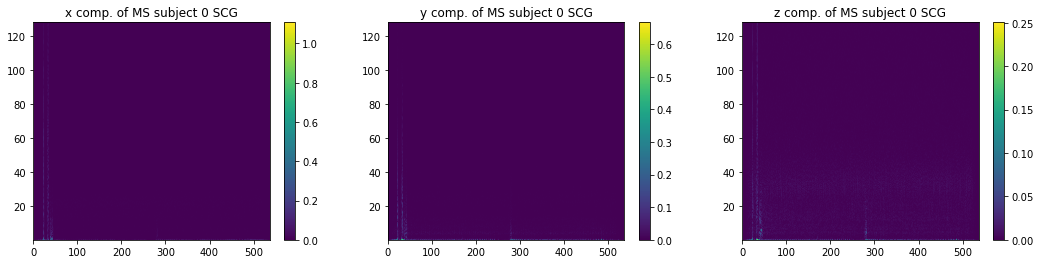

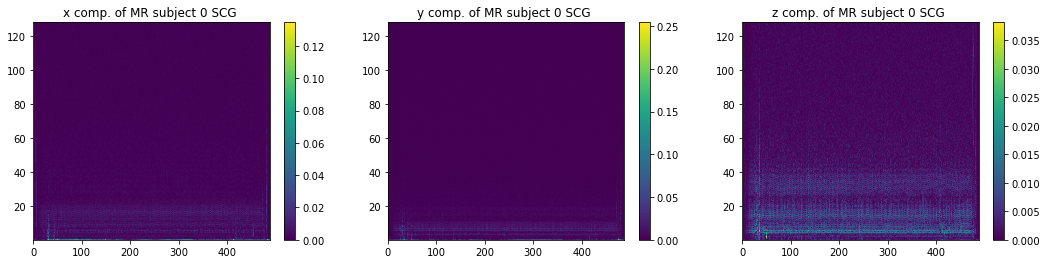

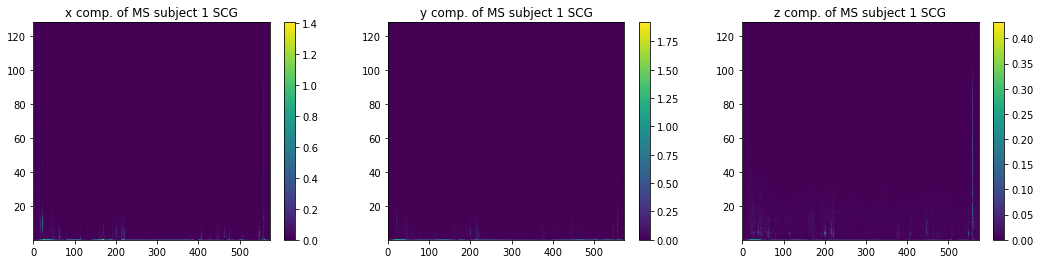

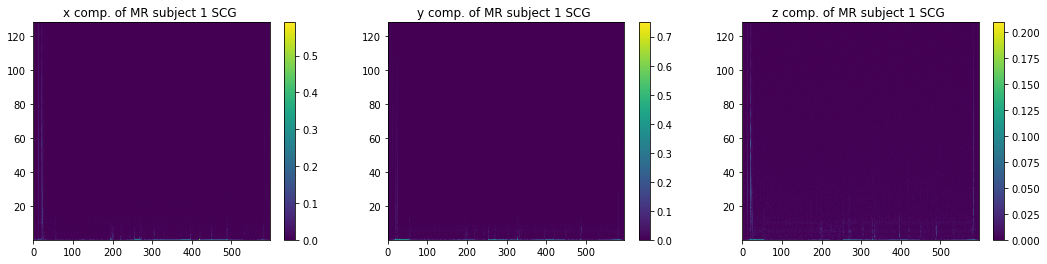

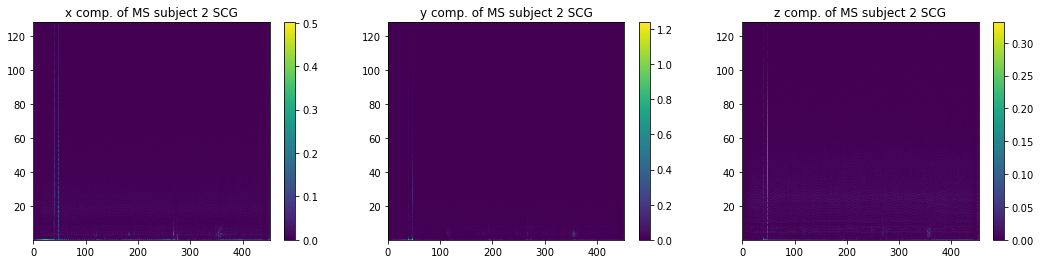

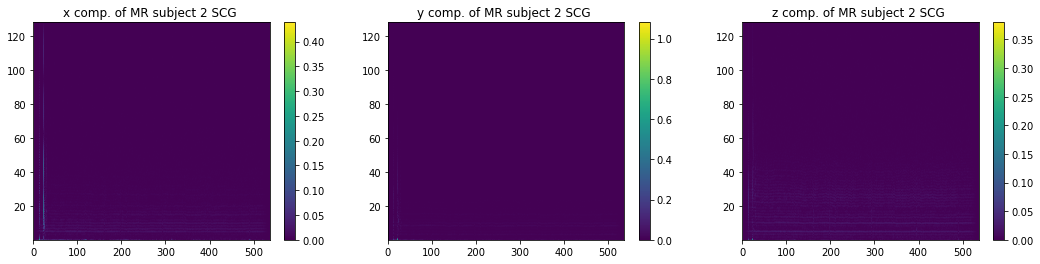

In [28]:
for i in range(len(diseased_MS['Patient ID'].index)):
    
        MS_s_x, MS_e_x, MS_end_x = output_spectrogram(MS_x[i].data, MS_x[i].stats.sampling_rate)
        MS_s_y, MS_e_y, MS_end_y = output_spectrogram(MS_y[i].data, MS_y[i].stats.sampling_rate)
        MS_s_z, MS_e_z, MS_end_z = output_spectrogram(MS_z[i].data, MS_z[i].stats.sampling_rate)
        
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,4))

        ax1.imshow(MS_s_x, interpolation="nearest", extent= MS_e_x, vmin =0)
        ax1.axis('tight')
        ax1.set_xlim(0, MS_end_x)
        ax1.title.set_text('x comp. of MS subject {} SCG'.format(i))
        ax1.grid(False)
        fig.colorbar(ax1.images[0], ax = ax1)
       
        
        ax2.imshow(MS_s_y, interpolation="nearest", extent= MS_e_y, vmin = 0)
        ax2.axis('tight')
        ax2.set_xlim(0, MS_end_y)
        ax2.title.set_text('y comp. of MS subject {} SCG'.format(i))
        ax2.grid(False)
        fig.colorbar(ax2.images[0], ax = ax2)
        
        ax3.imshow(MS_s_z, interpolation="nearest", extent= MS_e_z, vmin =0)
        ax3.axis('tight')
        ax3.set_xlim(0, MS_end_z)
        ax3.title.set_text('z comp. of MS subject {} SCG'.format(i))
        ax3.grid(False)
        fig.colorbar(ax3.images[0], ax = ax3)
        
        
        MR_s_x, MR_e_x, MR_end_x = output_spectrogram(MR_x[i].data, MR_x[i].stats.sampling_rate)
        MR_s_y, MR_e_y, MR_end_y = output_spectrogram(MR_y[i].data, MR_y[i].stats.sampling_rate)
        MR_s_z, MR_e_z, MR_end_z = output_spectrogram(MR_z[i].data, MR_z[i].stats.sampling_rate)
        
        fig, (ax4, ax5, ax6) = plt.subplots(1, 3,  figsize=(18,4))

        ax4.imshow(MR_s_x, interpolation="nearest", extent= MR_e_x, vmin = 0)
        ax4.axis('tight')
        ax4.set_xlim(0, MR_end_x)
        ax4.title.set_text('x comp. of MR subject {} SCG '.format(i))
        ax4.grid(False)
        fig.colorbar(ax4.images[0], ax = ax4)
        
        ax5.imshow(MR_s_y, interpolation="nearest", extent= MR_e_y, vmin = 0)
        ax5.axis('tight')
        ax5.set_xlim(0, MR_end_y)
        ax5.title.set_text('y comp. of MR subject {} SCG '.format(i))
        ax5.grid(False)
        fig.colorbar(ax5.images[0], ax = ax5)
    
        ax6.imshow(MR_s_z, interpolation="nearest", extent= MR_e_z, vmin = 0)
        ax6.axis('tight')
        ax6.set_xlim(0, MR_end_z)
        ax6.title.set_text('z comp. of MR subject {} SCG '.format(i))
        ax6.grid(False)
        fig.colorbar(ax6.images[0], ax = ax6)


### MR vs AS

/var/folders/gd/3d6ckpdn4q30skhxnvs_p7b80000gn/T/ipykernel_15655/735666451.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,4))


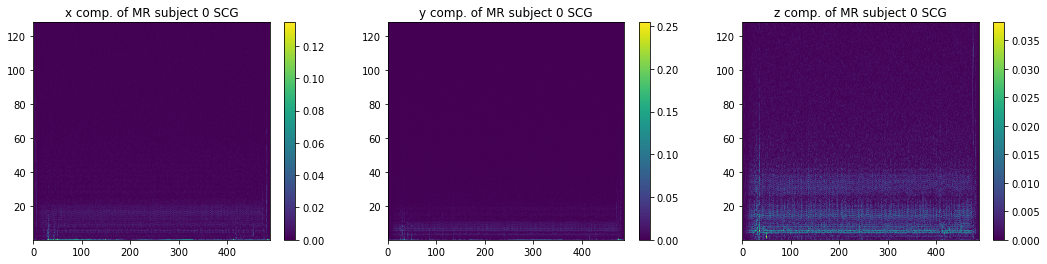

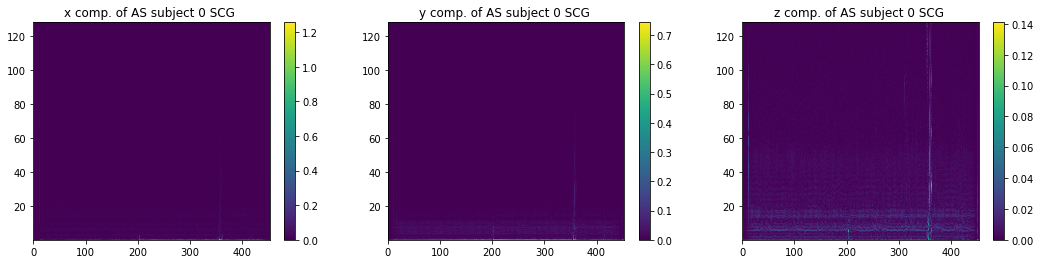

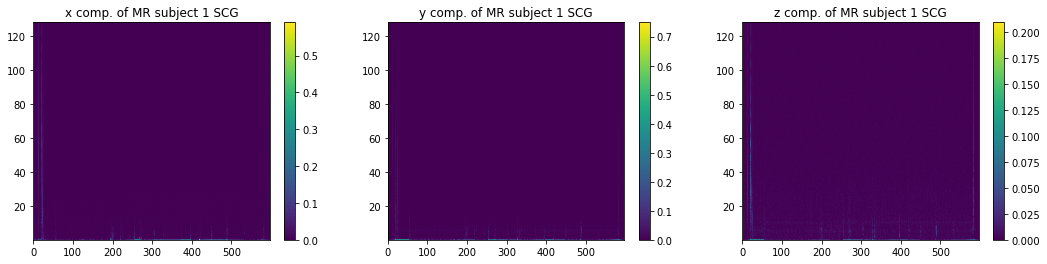

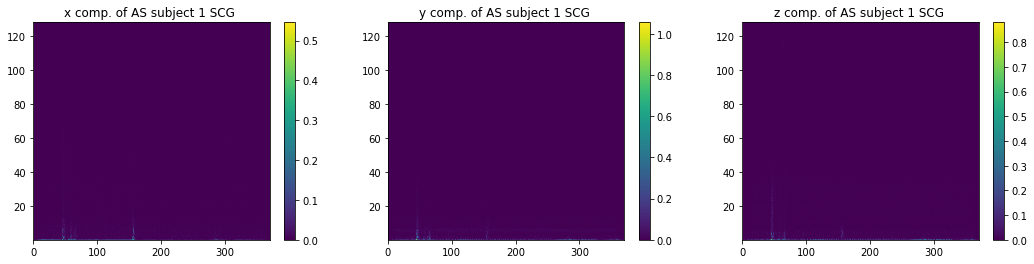

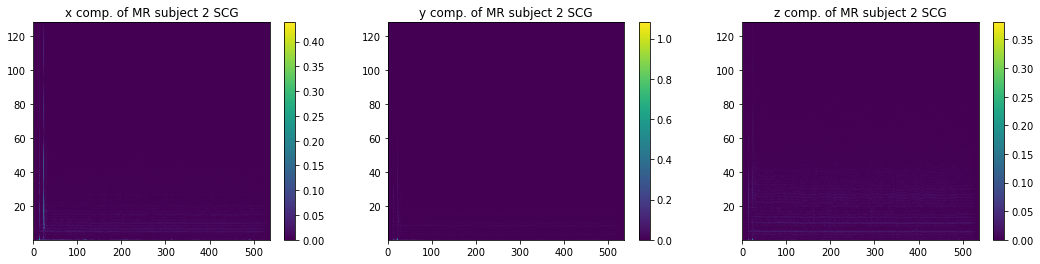

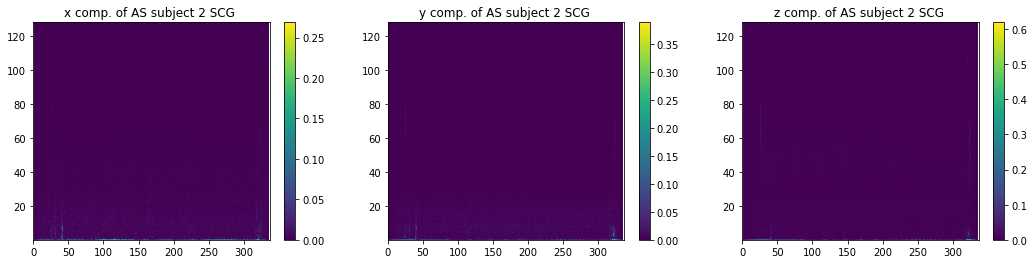

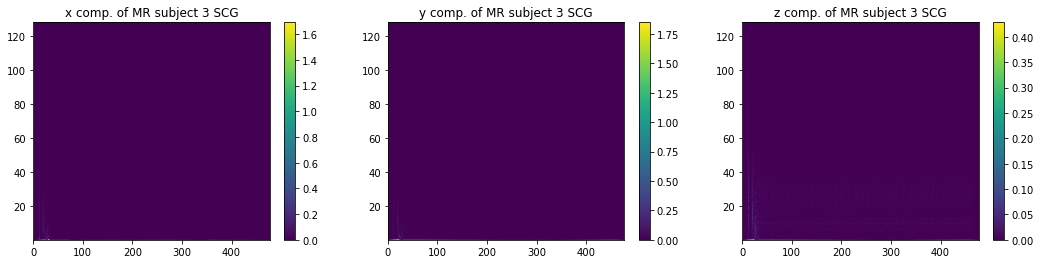

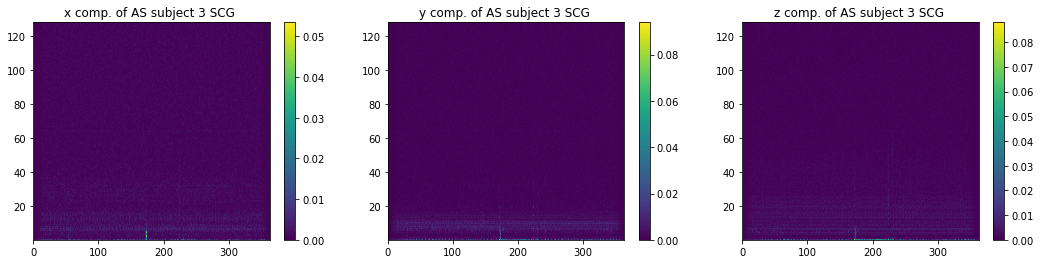

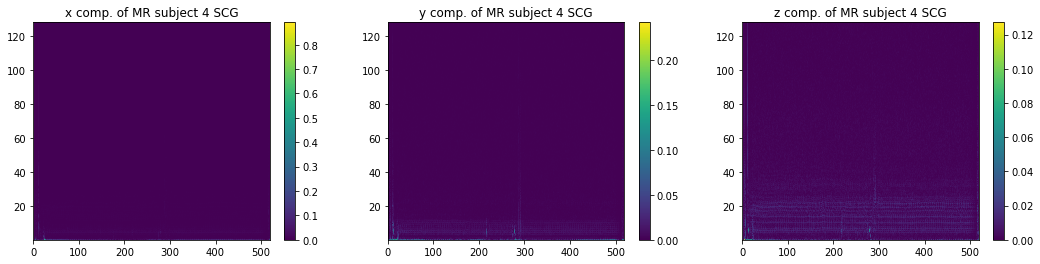

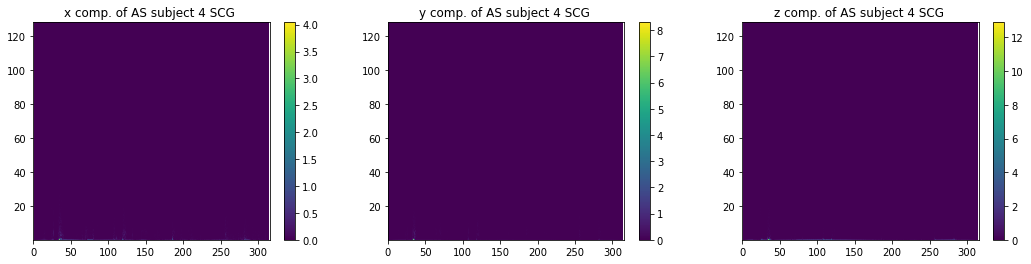

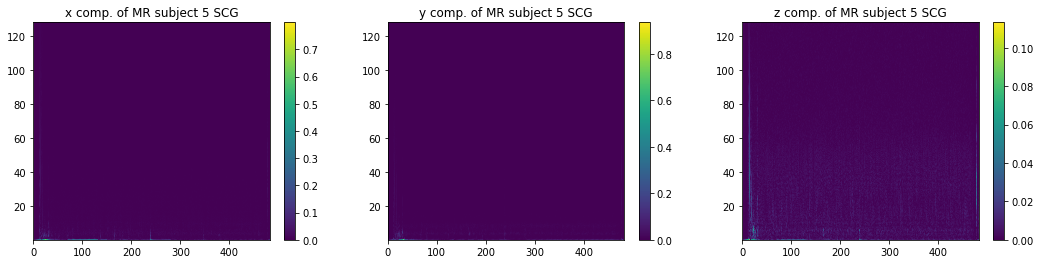

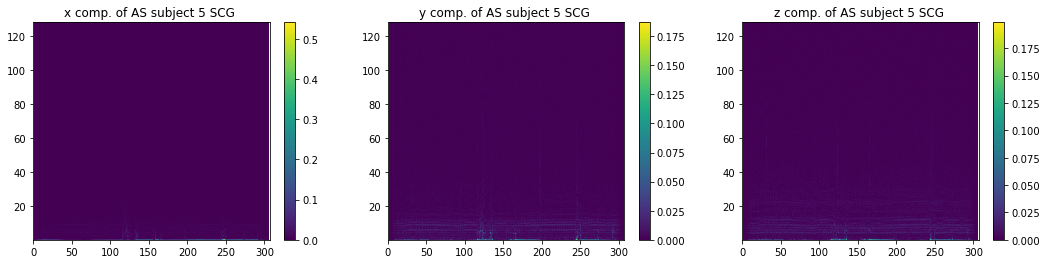

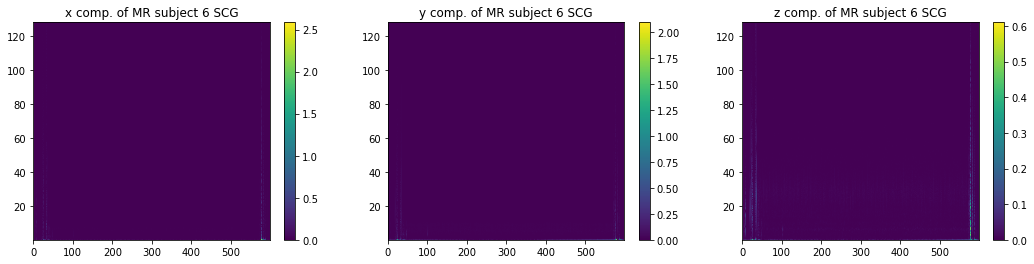

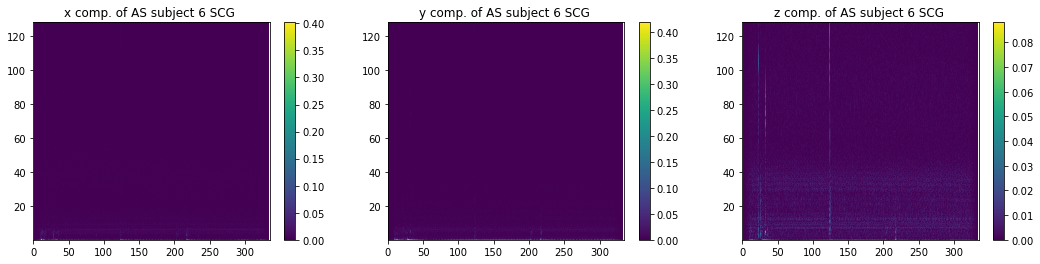

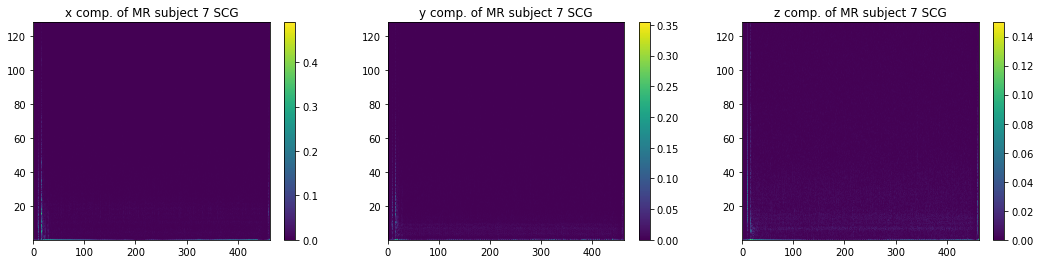

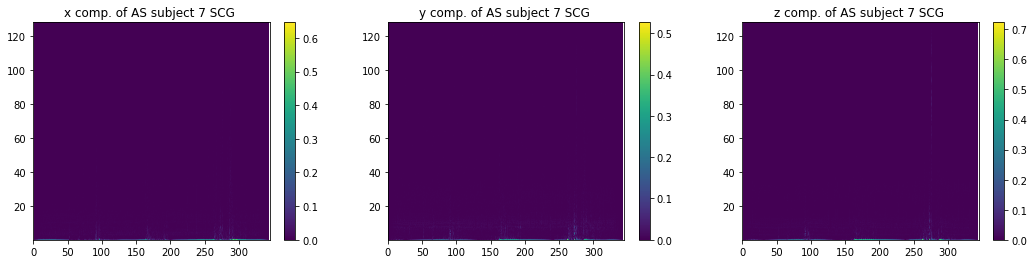

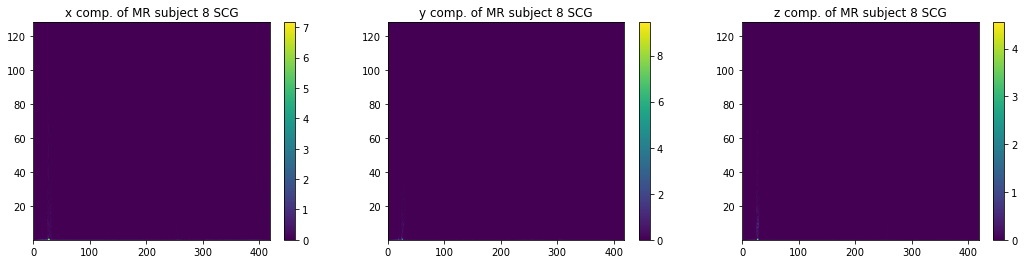

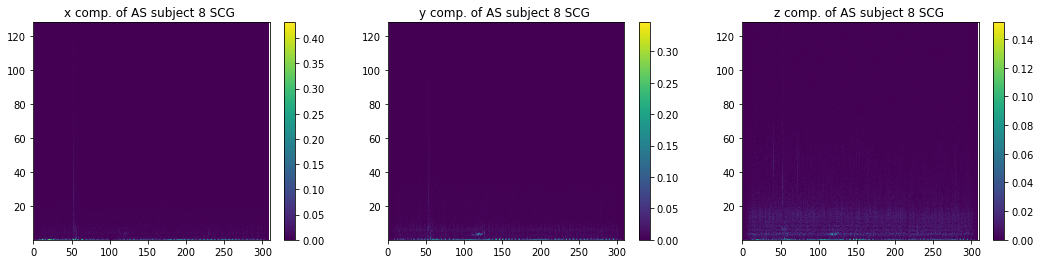

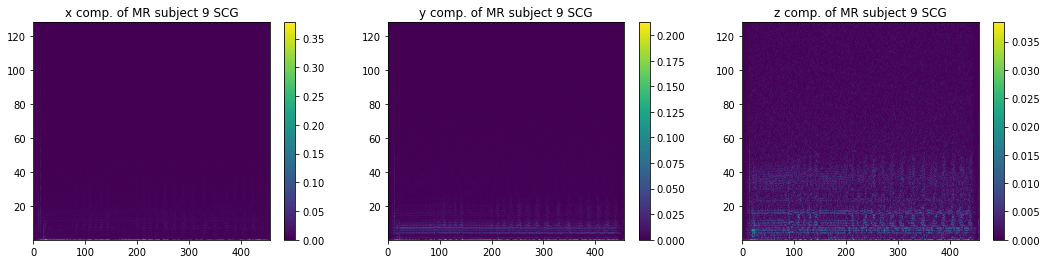

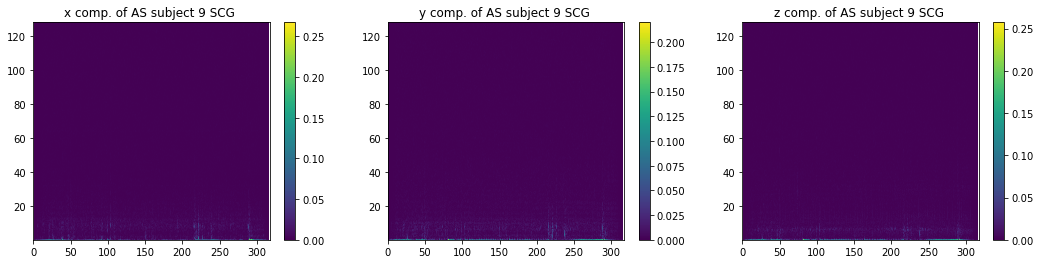

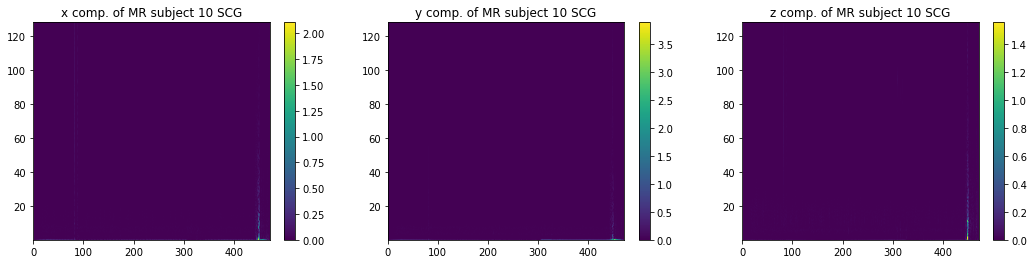

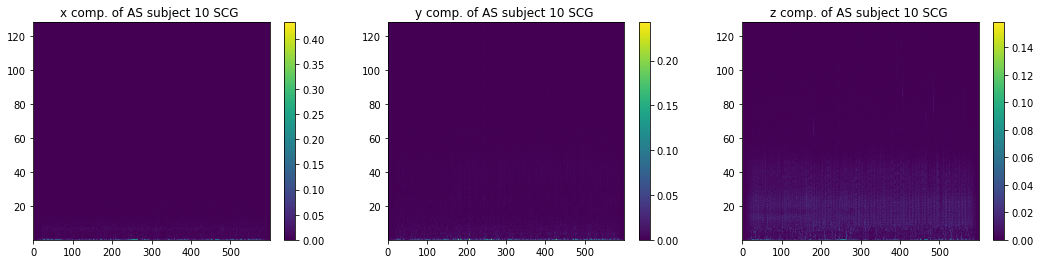

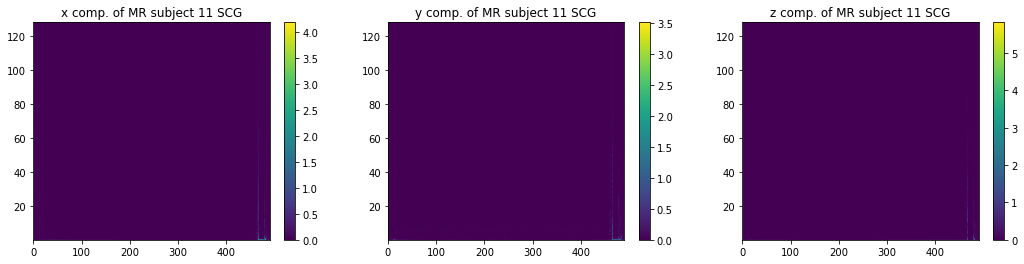

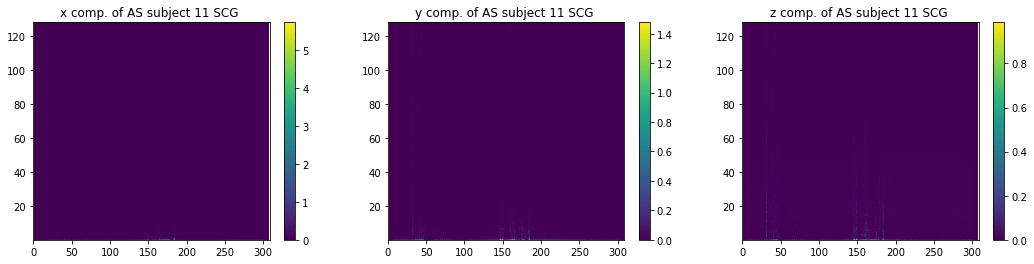

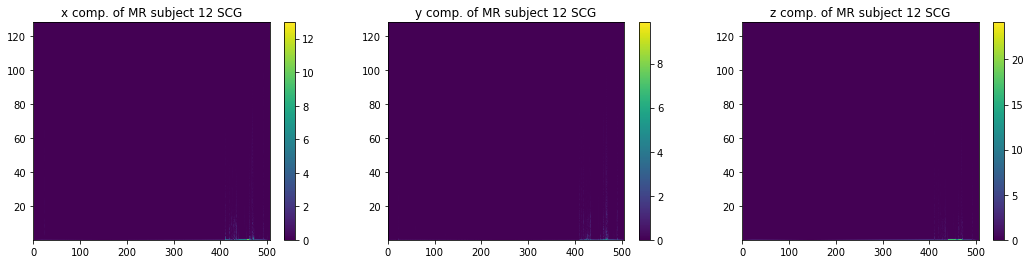

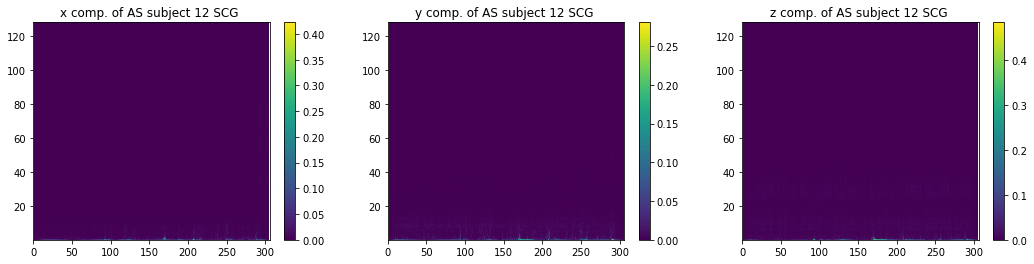

In [29]:
for i in range(len(diseased_MR['Patient ID'].index)):
    
        MR_s_x, MR_e_x, MR_end_x = output_spectrogram(MR_x[i].data, MR_x[i].stats.sampling_rate)
        MR_s_y, MR_e_y, MR_end_y = output_spectrogram(MR_y[i].data, MR_y[i].stats.sampling_rate)
        MR_s_z, MR_e_z, MR_end_z = output_spectrogram(MR_z[i].data, MR_z[i].stats.sampling_rate)

        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,4))

        ax1.imshow(MR_s_x, interpolation="nearest", extent= MR_e_x, vmin =0)
        ax1.axis('tight')
        ax1.set_xlim(0, MR_end_x)
        ax1.title.set_text('x comp. of MR subject {} SCG'.format(i))
        ax1.grid(False)
        fig.colorbar(ax1.images[0], ax = ax1)
       
        
        ax2.imshow(MR_s_y, interpolation="nearest", extent= MR_e_y, vmin = 0)
        ax2.axis('tight')
        ax2.set_xlim(0, MR_end_y)
        ax2.title.set_text('y comp. of MR subject {} SCG'.format(i))
        ax2.grid(False)
        fig.colorbar(ax2.images[0], ax = ax2)
        
        ax3.imshow(MR_s_z, interpolation="nearest", extent= MR_e_z, vmin =0)
        ax3.axis('tight')
        ax3.set_xlim(0, MR_end_z)
        ax3.title.set_text('z comp. of MR subject {} SCG'.format(i))
        ax3.grid(False)
        fig.colorbar(ax3.images[0], ax = ax3)
        
        
        AS_s_x, AS_e_x, AS_end_x = output_spectrogram(AS_x[i].data, AS_x[i].stats.sampling_rate)
        AS_s_y, AS_e_y, AS_end_y = output_spectrogram(AS_y[i].data, AS_y[i].stats.sampling_rate)
        AS_s_z, AS_e_z, AS_end_z = output_spectrogram(AS_z[i].data, AS_z[i].stats.sampling_rate)
        
        fig, (ax4, ax5, ax6) = plt.subplots(1, 3,  figsize=(18,4))

        ax4.imshow(AS_s_x, interpolation="nearest", extent= AS_e_x, vmin = 0)
        ax4.axis('tight')
        ax4.set_xlim(0, AS_end_x)
        ax4.title.set_text('x comp. of AS subject {} SCG '.format(i))
        ax4.grid(False)
        fig.colorbar(ax4.images[0], ax = ax4)
        
        ax5.imshow(AS_s_y, interpolation="nearest", extent= AS_e_y, vmin = 0)
        ax5.axis('tight')
        ax5.set_xlim(0, AS_end_y)
        ax5.title.set_text('y comp. of AS subject {} SCG '.format(i))
        ax5.grid(False)
        fig.colorbar(ax5.images[0], ax = ax5)
    
        ax6.imshow(AS_s_z, interpolation="nearest", extent= AS_e_z, vmin = 0)
        ax6.axis('tight')
        ax6.set_xlim(0, AS_end_z)
        ax6.title.set_text('z comp. of AS subject {} SCG '.format(i))
        ax6.grid(False)
        fig.colorbar(ax6.images[0], ax = ax6)

### MR vs AR

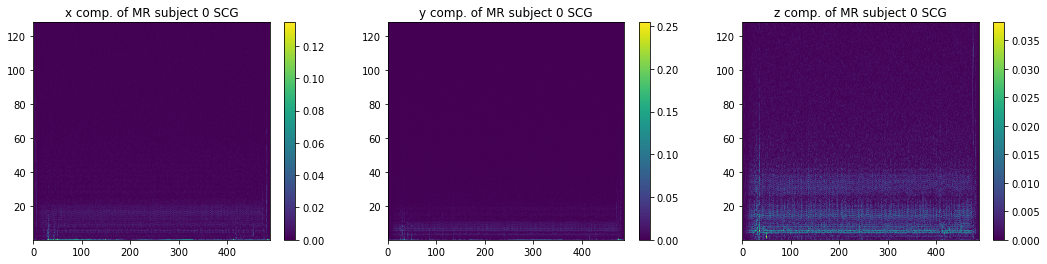

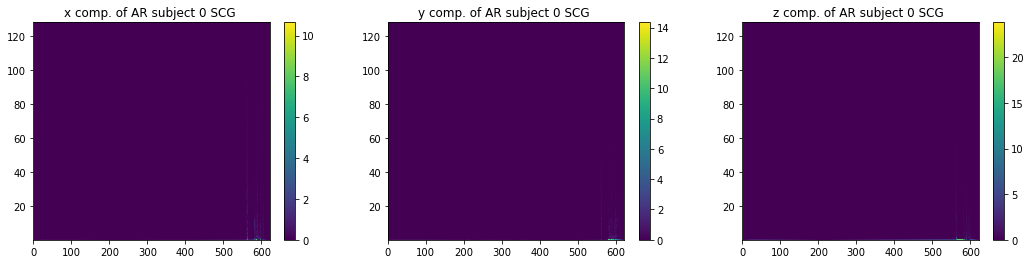

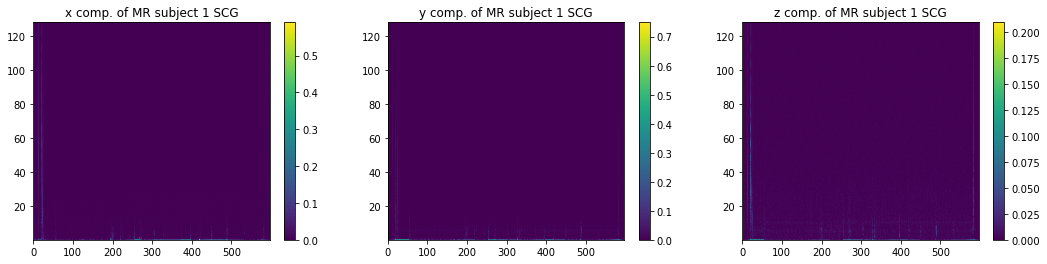

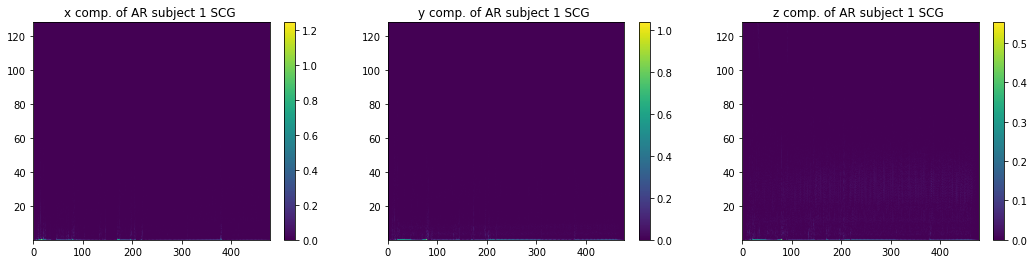

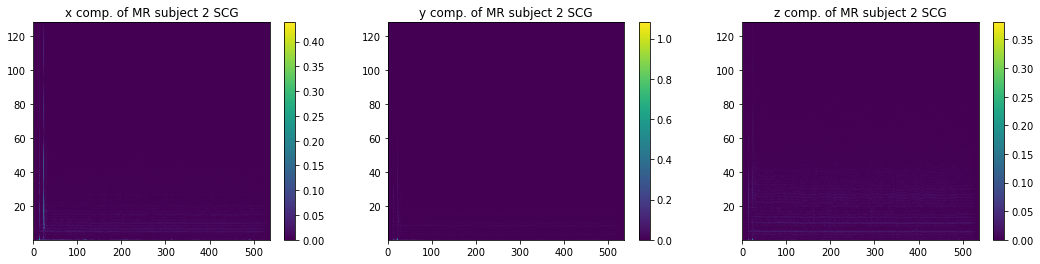

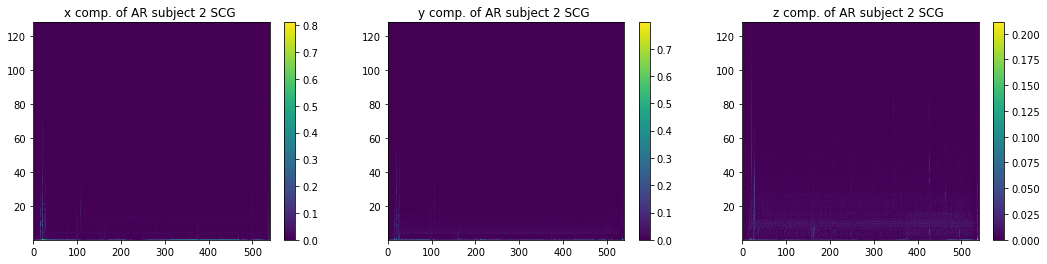

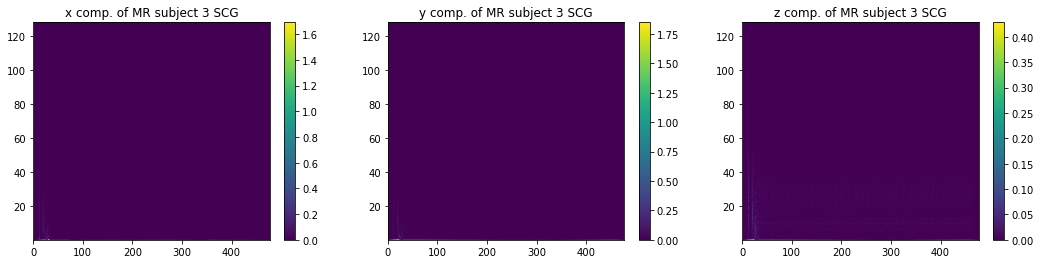

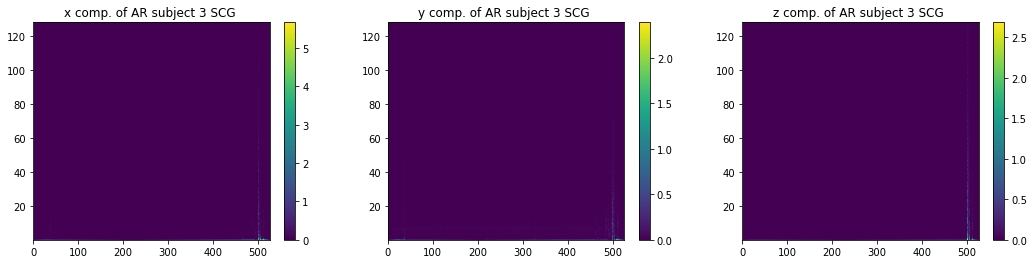

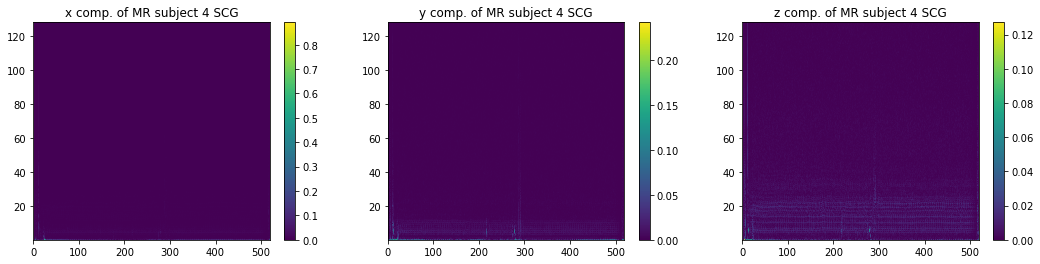

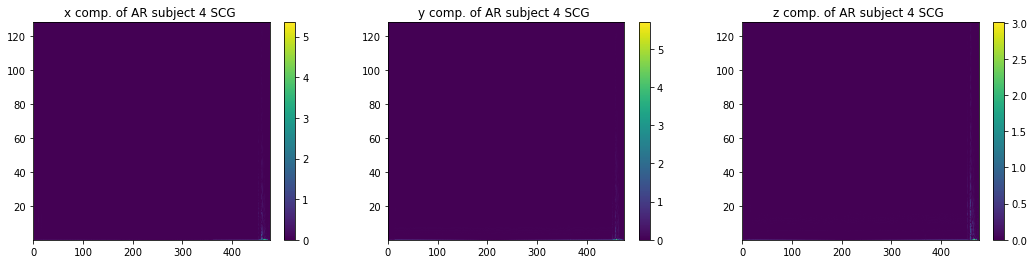

In [30]:
for i in range(len(diseased_AR['Patient ID'].index)):
    
        MR_s_x, MR_e_x, MR_end_x = output_spectrogram(MR_x[i].data, MR_x[i].stats.sampling_rate)
        MR_s_y, MR_e_y, MR_end_y = output_spectrogram(MR_y[i].data, MR_y[i].stats.sampling_rate)
        MR_s_z, MR_e_z, MR_end_z = output_spectrogram(MR_z[i].data, MR_z[i].stats.sampling_rate)

        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,4))

        ax1.imshow(MR_s_x, interpolation="nearest", extent= MR_e_x, vmin =0)
        ax1.axis('tight')
        ax1.set_xlim(0, MR_end_x)
        ax1.title.set_text('x comp. of MR subject {} SCG'.format(i))
        ax1.grid(False)
        fig.colorbar(ax1.images[0], ax = ax1)
       
        
        ax2.imshow(MR_s_y, interpolation="nearest", extent= MR_e_y, vmin = 0)
        ax2.axis('tight')
        ax2.set_xlim(0, MR_end_y)
        ax2.title.set_text('y comp. of MR subject {} SCG'.format(i))
        ax2.grid(False)
        fig.colorbar(ax2.images[0], ax = ax2)
        
        ax3.imshow(MR_s_z, interpolation="nearest", extent= MR_e_z, vmin =0)
        ax3.axis('tight')
        ax3.set_xlim(0, MR_end_z)
        ax3.title.set_text('z comp. of MR subject {} SCG'.format(i))
        ax3.grid(False)
        fig.colorbar(ax3.images[0], ax = ax3)
        
        
        AR_s_x, AR_e_x, AR_end_x = output_spectrogram(AR_x[i].data, AR_x[i].stats.sampling_rate)
        AR_s_y, AR_e_y, AR_end_y = output_spectrogram(AR_y[i].data, AR_y[i].stats.sampling_rate)
        AR_s_z, AR_e_z, AR_end_z = output_spectrogram(AR_z[i].data, AR_z[i].stats.sampling_rate)
        
        fig, (ax4, ax5, ax6) = plt.subplots(1, 3,  figsize=(18,4))

        ax4.imshow(AR_s_x, interpolation="nearest", extent= AR_e_x, vmin = 0)
        ax4.axis('tight')
        ax4.set_xlim(0, AR_end_x)
        ax4.title.set_text('x comp. of AR subject {} SCG '.format(i))
        ax4.grid(False)
        fig.colorbar(ax4.images[0], ax = ax4)
        
        ax5.imshow(AR_s_y, interpolation="nearest", extent= AR_e_y, vmin = 0)
        ax5.axis('tight')
        ax5.set_xlim(0, AR_end_y)
        ax5.title.set_text('y comp. of AR subject {} SCG '.format(i))
        ax5.grid(False)
        fig.colorbar(ax5.images[0], ax = ax5)
    
        ax6.imshow(AR_s_z, interpolation="nearest", extent= AR_e_z, vmin = 0)
        ax6.axis('tight')
        ax6.set_xlim(0, AR_end_z)
        ax6.title.set_text('z comp. of AR subject {} SCG '.format(i))
        ax6.grid(False)
        fig.colorbar(ax6.images[0], ax = ax6)

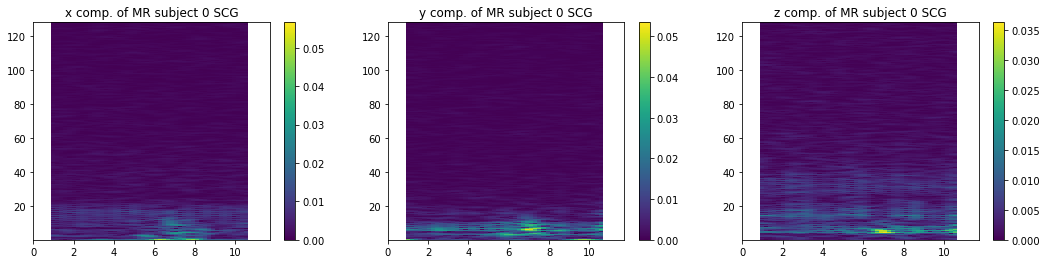

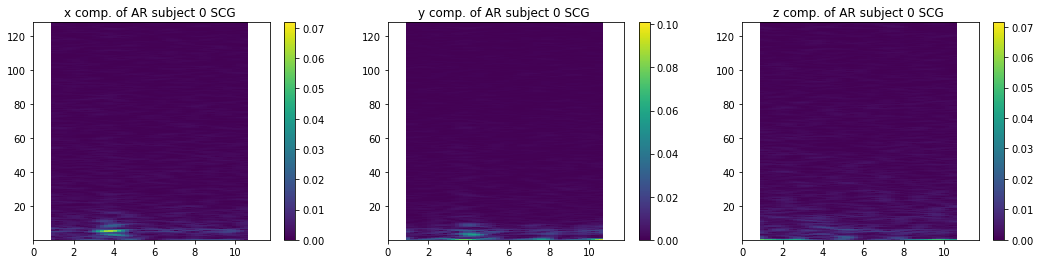

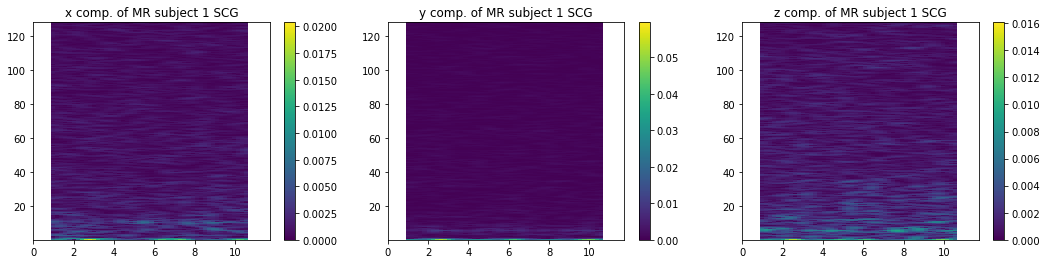

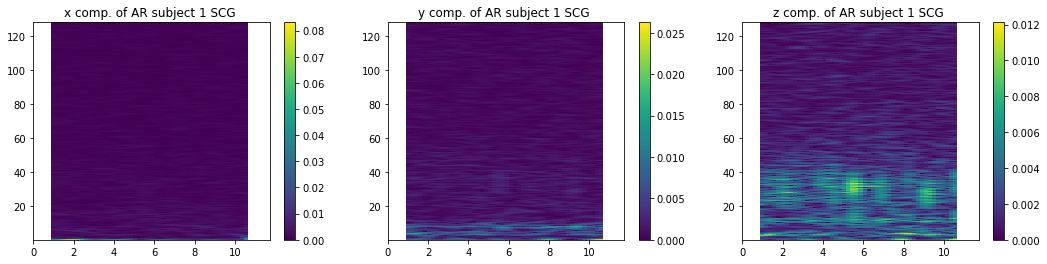

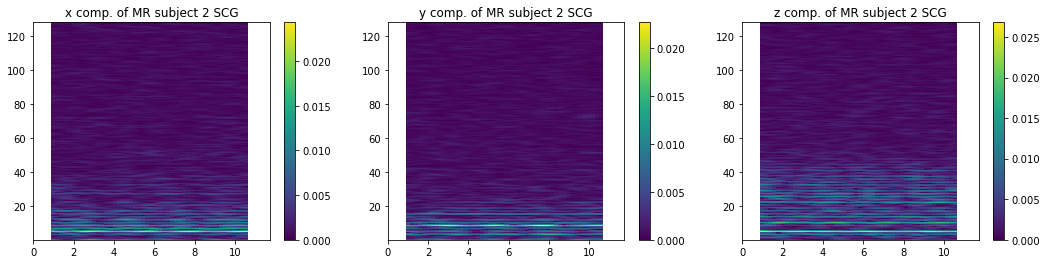

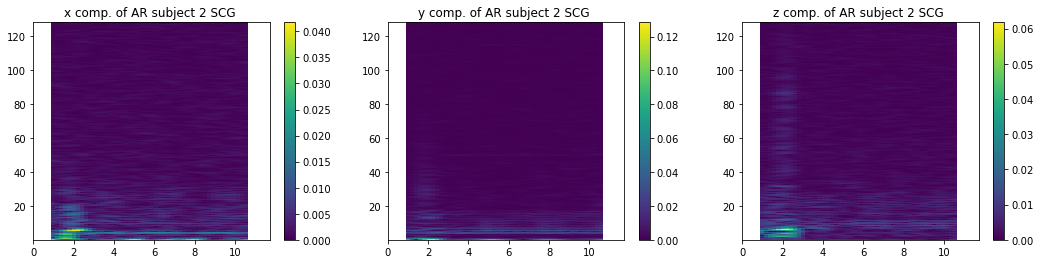

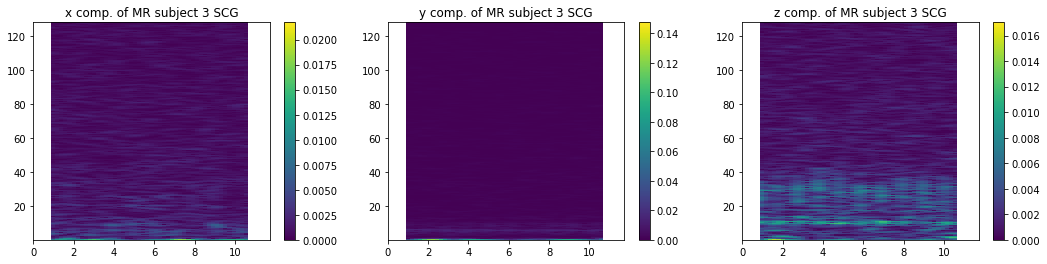

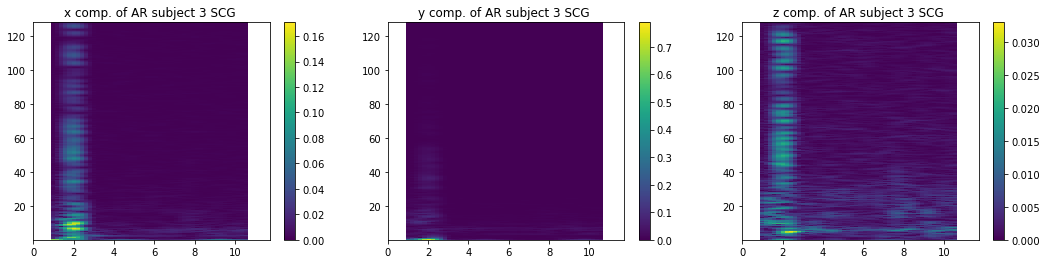

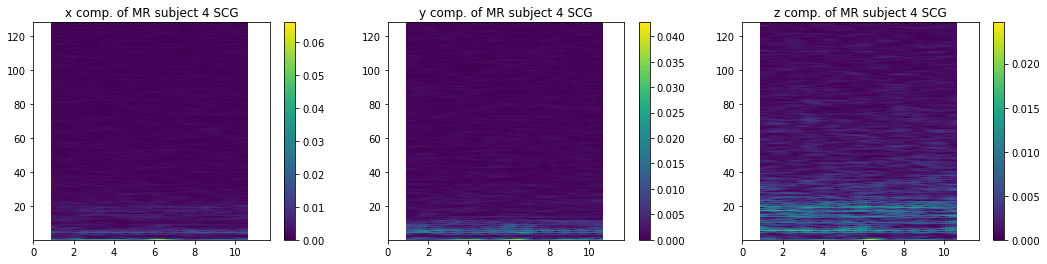

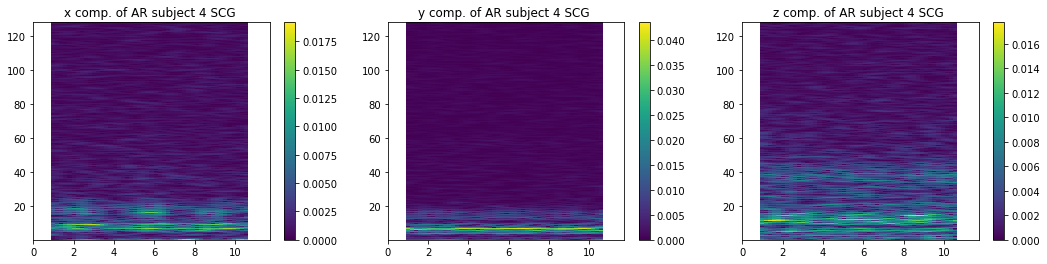

In [31]:
for i in range(len(diseased_AR['Patient ID'].index)):
    
        MR_s_x, MR_e_x, MR_end_x = output_spectrogram(MR_x[i][9000:12000], MR_x[i].stats.sampling_rate)
        MR_s_y, MR_e_y, MR_end_y = output_spectrogram(MR_y[i][9000:12000], MR_y[i].stats.sampling_rate)
        MR_s_z, MR_e_z, MR_end_z = output_spectrogram(MR_z[i][9000:12000], MR_z[i].stats.sampling_rate)

        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,4))

        ax1.imshow(MR_s_x, interpolation="nearest", extent= MR_e_x, vmin =0)
        ax1.axis('tight')
        ax1.set_xlim(0, MR_end_x)
        ax1.title.set_text('x comp. of MR subject {} SCG'.format(i))
        ax1.grid(False)
        fig.colorbar(ax1.images[0], ax = ax1)
       
        
        ax2.imshow(MR_s_y, interpolation="nearest", extent= MR_e_y, vmin = 0)
        ax2.axis('tight')
        ax2.set_xlim(0, MR_end_y)
        ax2.title.set_text('y comp. of MR subject {} SCG'.format(i))
        ax2.grid(False)
        fig.colorbar(ax2.images[0], ax = ax2)
        
        ax3.imshow(MR_s_z, interpolation="nearest", extent= MR_e_z, vmin =0)
        ax3.axis('tight')
        ax3.set_xlim(0, MR_end_z)
        ax3.title.set_text('z comp. of MR subject {} SCG'.format(i))
        ax3.grid(False)
        fig.colorbar(ax3.images[0], ax = ax3)
        
        
        AR_s_x, AR_e_x, AR_end_x = output_spectrogram(AR_x[i][9000:12000], AR_x[i].stats.sampling_rate)
        AR_s_y, AR_e_y, AR_end_y = output_spectrogram(AR_y[i][9000:12000], AR_y[i].stats.sampling_rate)
        AR_s_z, AR_e_z, AR_end_z = output_spectrogram(AR_z[i][9000:12000], AR_z[i].stats.sampling_rate)
        
        fig, (ax4, ax5, ax6) = plt.subplots(1, 3,  figsize=(18,4))

        ax4.imshow(AR_s_x, interpolation="nearest", extent= AR_e_x, vmin = 0)
        ax4.axis('tight')
        ax4.set_xlim(0, AR_end_x)
        ax4.title.set_text('x comp. of AR subject {} SCG '.format(i))
        ax4.grid(False)
        fig.colorbar(ax4.images[0], ax = ax4)
        
        ax5.imshow(AR_s_y, interpolation="nearest", extent= AR_e_y, vmin = 0)
        ax5.axis('tight')
        ax5.set_xlim(0, AR_end_y)
        ax5.title.set_text('y comp. of AR subject {} SCG '.format(i))
        ax5.grid(False)
        fig.colorbar(ax5.images[0], ax = ax5)
    
        ax6.imshow(AR_s_z, interpolation="nearest", extent= AR_e_z, vmin = 0)
        ax6.axis('tight')
        ax6.set_xlim(0, AR_end_z)
        ax6.title.set_text('z comp. of AR subject {} SCG '.format(i))
        ax6.grid(False)
        fig.colorbar(ax6.images[0], ax = ax6)

### all of them 

In [32]:
def difference(dataset1, dataset2, dataset3, dataset4, seed = None):
    np.random.seed(seed)
    
    len_of_dt1 = len(dataset1)
    len_of_dt2 = len(dataset2)
    len_of_dt3 = len(dataset3)
    len_of_dt4 = len(dataset4)
    
    i = np.random.randint(0,len_of_dt1)
    j = np.random.randint(0,len_of_dt2)
    k = np.random.randint(0,len_of_dt3)
    l = np.random.randint(0,len_of_dt4)
    
    MR_s_x, MR_e_x, MR_end_x = output_spectrogram(MR_x[i].data, MR_x[i].stats.sampling_rate)
    MR_s_y, MR_e_y, MR_end_y = output_spectrogram(MR_y[i].data, MR_y[i].stats.sampling_rate)
    MR_s_z, MR_e_z, MR_end_z = output_spectrogram(MR_z[i].data, MR_z[i].stats.sampling_rate)

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,4))

    ax1.imshow(MR_s_x, interpolation="nearest", extent= MR_e_x, vmin =0)
    ax1.axis('tight')
    ax1.set_xlim(0, MR_end_x)
    ax1.title.set_text('x comp. of MR subject {} SCG'.format(i))
    ax1.grid(False)
    fig.colorbar(ax1.images[0], ax = ax1)
       
        
    ax2.imshow(MR_s_y, interpolation="nearest", extent= MR_e_y, vmin = 0)
    ax2.axis('tight')
    ax2.set_xlim(0, MR_end_y)
    ax2.title.set_text('y comp. of MR subject {} SCG'.format(i))
    ax2.grid(False)
    fig.colorbar(ax2.images[0], ax = ax2)
        
    ax3.imshow(MR_s_z, interpolation="nearest", extent= MR_e_z, vmin =0)
    ax3.axis('tight')
    ax3.set_xlim(0, MR_end_z)
    ax3.title.set_text('z comp. of MR subject {} SCG'.format(i))
    ax3.grid(False)
    fig.colorbar(ax3.images[0], ax = ax3)
        
        
    AR_s_x, AR_e_x, AR_end_x = output_spectrogram(AR_x[j].data, AR_x[j].stats.sampling_rate)
    AR_s_y, AR_e_y, AR_end_y = output_spectrogram(AR_y[j].data, AR_y[j].stats.sampling_rate)
    AR_s_z, AR_e_z, AR_end_z = output_spectrogram(AR_z[j].data, AR_z[j].stats.sampling_rate)
        
    fig, (ax4, ax5, ax6) = plt.subplots(1, 3,  figsize=(18,4))
    
    ax4.imshow(AR_s_x, interpolation="nearest", extent= AR_e_x, vmin = 0)
    ax4.axis('tight')
    ax4.set_xlim(0, AR_end_x)
    ax4.title.set_text('x comp. of AR subject {} SCG '.format(j))
    ax4.grid(False)
    fig.colorbar(ax4.images[0], ax = ax4)
        
    ax5.imshow(AR_s_y, interpolation="nearest", extent= AR_e_y, vmin = 0)
    ax5.axis('tight')
    ax5.set_xlim(0, AR_end_y)
    ax5.title.set_text('y comp. of AR subject {} SCG '.format(j))
    ax5.grid(False)
    fig.colorbar(ax5.images[0], ax = ax5)

    ax6.imshow(AR_s_z, interpolation="nearest", extent= AR_e_z, vmin = 0)
    ax6.axis('tight')
    ax6.set_xlim(0, AR_end_z)
    ax6.title.set_text('z comp. of AR subject {} SCG '.format(j))
    ax6.grid(False)
    fig.colorbar(ax6.images[0], ax = ax6)
    
            
    AS_s_x, AS_e_x, AS_end_x = output_spectrogram(AS_x[k].data, AS_x[k].stats.sampling_rate)
    AS_s_y, AS_e_y, AS_end_y = output_spectrogram(AS_y[k].data, AS_y[k].stats.sampling_rate)
    AS_s_z, AS_e_z, AS_end_z = output_spectrogram(AS_z[k].data, AS_z[k].stats.sampling_rate)

    fig, (ax4, ax5, ax6) = plt.subplots(1, 3,  figsize=(18,4))

    ax4.imshow(AS_s_x, interpolation="nearest", extent= AS_e_x, vmin = 0)
    ax4.axis('tight')
    ax4.set_xlim(0, AS_end_x)
    ax4.title.set_text('x comp. of AS subject {} SCG '.format(k))
    ax4.grid(False)
    fig.colorbar(ax4.images[0], ax = ax4)

    ax5.imshow(AS_s_y, interpolation="nearest", extent= AS_e_y, vmin = 0)
    ax5.axis('tight')
    ax5.set_xlim(0, AS_end_y)
    ax5.title.set_text('y comp. of AS subject {} SCG '.format(k))
    ax5.grid(False)
    fig.colorbar(ax5.images[0], ax = ax5)

    ax6.imshow(AS_s_z, interpolation="nearest", extent= AS_e_z, vmin = 0)
    ax6.axis('tight')
    ax6.set_xlim(0, AS_end_z)
    ax6.title.set_text('z comp. of AS subject {} SCG '.format(k))
    ax6.grid(False)
    fig.colorbar(ax6.images[0], ax = ax6)

    MS_s_x, MS_e_x, MS_end_x = output_spectrogram(MS_x[l].data, MS_x[l].stats.sampling_rate)
    MS_s_y, MS_e_y, MS_end_y = output_spectrogram(MS_y[l].data, MS_y[l].stats.sampling_rate)
    MS_s_z, MS_e_z, MS_end_z = output_spectrogram(MS_z[l].data, MS_z[l].stats.sampling_rate)

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,4))

    ax1.imshow(MS_s_x, interpolation="nearest", extent= MS_e_x, vmin =0)
    ax1.axis('tight')
    ax1.set_xlim(0, MS_end_x)
    ax1.title.set_text('x comp. of MS subject {} SCG'.format(l))
    ax1.grid(False)
    fig.colorbar(ax1.images[0], ax = ax1)


    ax2.imshow(MS_s_y, interpolation="nearest", extent= MS_e_y, vmin = 0)
    ax2.axis('tight')
    ax2.set_xlim(0, MS_end_y)
    ax2.title.set_text('y comp. of MS subject {} SCG'.format(l))
    ax2.grid(False)
    fig.colorbar(ax2.images[0], ax = ax2)

    ax3.imshow(MS_s_z, interpolation="nearest", extent= MS_e_z, vmin =0)
    ax3.axis('tight')
    ax3.set_xlim(0, MS_end_z)
    ax3.title.set_text('z comp. of MS subject {} SCG'.format(l))
    ax3.grid(False)
    fig.colorbar(ax3.images[0], ax = ax3)



In [40]:
#note to myself: do not change order
dataset1 = np.stack((MR_x, MR_y, MR_z), axis=-1)
dataset2 = np.stack((AR_x, AR_y, AR_z), axis=-1)
dataset3 = np.stack((AS_x, AS_y, AS_z), axis=-1)
dataset4 = np.stack((MS_x, MS_y, MS_z), axis=-1)


In [41]:
dataset1.shape

(13, 3)

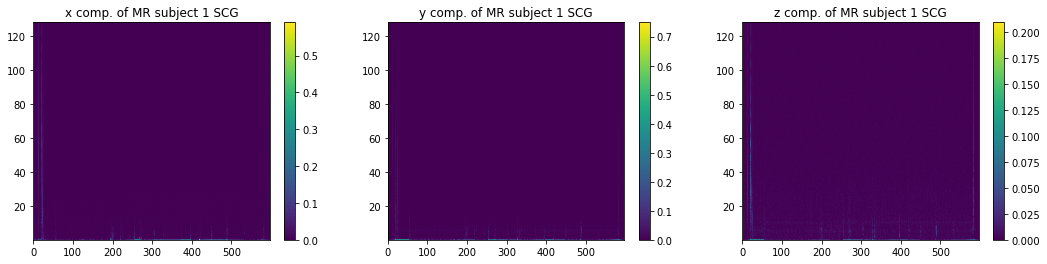

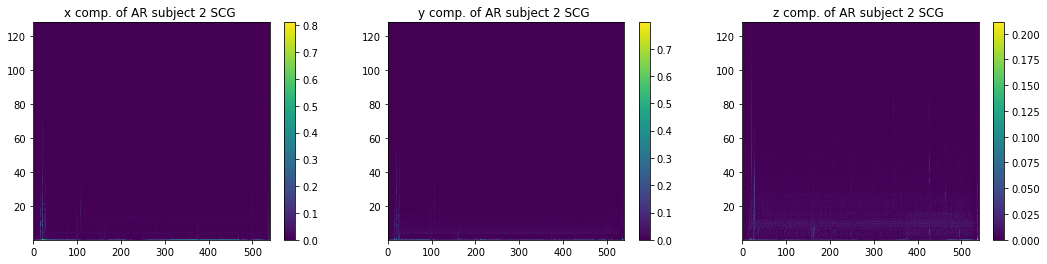

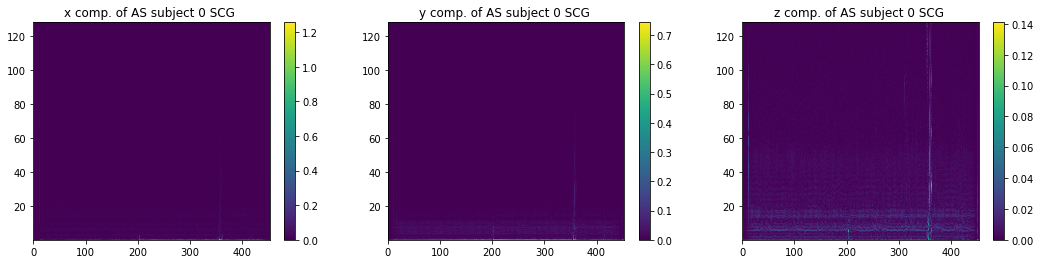

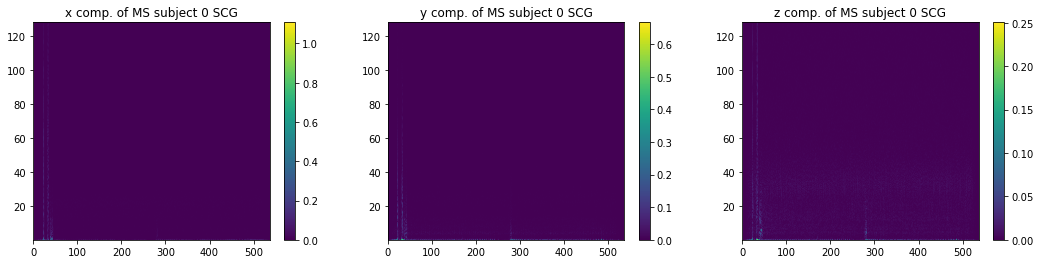

In [35]:
difference(dataset1, dataset2, dataset3, dataset4)

In [46]:
type(dataset1[0][0])

obspy.core.trace.Trace

In [42]:
np.save(dir_path + "/mr", dataset1, allow_pickle= True)
np.save(dir_path + "/ar", dataset2, allow_pickle= True)
np.save(dir_path + "/as", dataset3, allow_pickle= True)
np.save(dir_path + "/ms", dataset4, allow_pickle= True)

In [43]:
#sanity check
mr = np.load(dir_path + "/mr.npy", allow_pickle= True)
mr.shape

(13, 3)

In [44]:
type(mr[0][0])

obspy.core.trace.Trace